# Setup

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

data = load_breast_cancer(return_X_y=True, as_frame=True)

#the first item, which has index 0 is the image data
x = data[0]

#the second item, which has index 1 is the cancer classification
y = data[1]

# benign cases (represented as 1) and malignant cases (represented as 0)
y.replace({0:"cancerous", 1:"non-cancerous"}, inplace=True)

In [4]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

def run_model(x, y, test_size, shuffle, stratify, random_state):

    # data split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle = shuffle, stratify = stratify, random_state=random_state)

    # train model
    linear_svc_model = LinearSVC(random_state=2541).fit(x_train, y_train)

    # evaluate model using test data

    # this is a chart of the confusion matrix
    print(f"""
          test_size: {test_size}
          shuffle: {shuffle}
          stratify: {stratify if type(stratify)==type(None) else "stratified"}
          random_state: {random_state}
          """)
    ConfusionMatrixDisplay.from_estimator(linear_svc_model, x_test, y_test)
    plt.show()

    return x_train, x_test, y_train, y_test, linear_svc_model

# Activity 0: Model evaluation confusion matrix

- Run the whole notebook ("Run All" button at the top of VS Code)
- Copy and paste the confusion matrix in the chat


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 2541
          


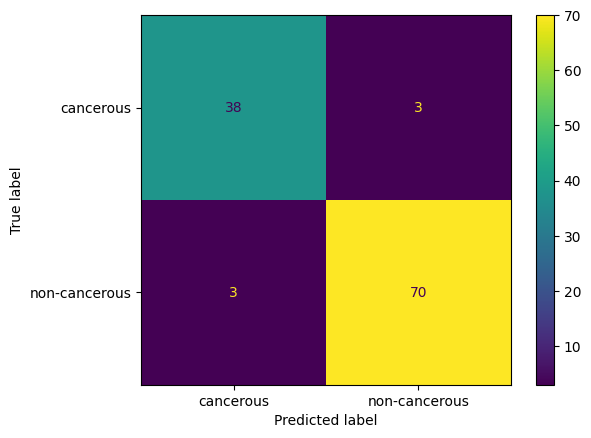

In [5]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

# Activity 1: Model evaluation metrics

- Answer the questions below on the confusion matrix that was outputted in Activity 0
- Use this source to help you https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning
- Use any other sources to help you, please includes them as references

## Q 1.1. How many...? Please complete the value column

Positive = cancerous

Negative = non-cancerous

### !!! ENTER YOUR ANSWER HERE FOR Q 1.1.

| Metric | Actual | Predicted | Value |
| ------ | ------ | --------- | ----- |
| True Positive (TP)  | + | + | ENTER VALUE HERE |
| True Negative (TN)  | - | - | ENTER VALUE HERE |
| False Positive (FP) | - | + | ENTER VALUE HERE |
| False Negative (FN) | + | - | ENTER VALUE HERE |

## Q 1.2. Calculate... Please complete the value column

These equations may help you:

![Model evaluation metrics](images/Model_evaluation_metrics.png)

### !!! ENTER YOUR ANSWER HERE FOR Q 1.2.

| Metric |  Value |
| ------ |  ----- |
| Accuracy    | ENTER VALUE HERE |
| Recall      | ENTER VALUE HERE |
| Precision   | ENTER VALUE HERE |
| Specificity | ENTER VALUE HERE |
| F1 Score    | ENTER VALUE HERE |

## Q 1.3. Which metric is the most appropriate to maximise for this use case? Why?

Choose one: Why?
- Accuracy
- Recall
- Precision 
- Specificity
- F1 Score

### !!! ENTER YOUR ANSWER HERE FOR Q 1.3.

## Q 1.4. Choose one classification metric that we have not covered yet from this list

https://scikit-learn.org/stable/api/sklearn.metrics.html  e.g. hamming loss, roc_curve, auc or cohen_kappa_score

- How is the metric calculated?
- In what circumstances would we use this metric over the 5 metrics we have already looked at in Q 1.2.?

### !!! ENTER YOUR ANSWER HERE FOR Q 1.4.

# Activity 2: Train/test split

The parameters for scikit-learn's train/test split can be seen on the documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# x_train, x_test, y_train, y_test = train_test_split( # this function splits x and y data into 4 parts. The first two are where the features, or x, are split into train and test. The second two are where the targets, or y, are split into train and test.
#                                                     x, # this is the features data 
#                                                     y, # this is the target data
#                                                     test_size=0.2, # this is the percentage of data that will be sectioned off in the test set so the train set will have 80% of the data and the test set will have 20%
#                                                     shuffle = True, # this shuffles the data before splitting it
#                                                     stratify = None, # this is used to ensure that the data is split in a way that preserves the percentage of samples for each class
#                                                     random_state=chosen_random_state # this is the seed state or random state
#                                                     )

## Q 2.1. Run the code below and comment on what happens when random_state changes when shuffle=True

These sources may be helpful:

a) https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/

b) https://www.geeksforgeeks.org/what-is-scikit-learn-random-state-in-splitting-dataset/

c) https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

### !!! ENTER YOUR ANSWER HERE FOR Q 2.1.

**Answer the following questions**:

- What happens to confusion matrices when the random_state changes?
- Why?
- What is best practice regarding random_state?

In [7]:
### Remove the hashes next to the code to run it

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=600)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=999)

## Q 2.2. Run the code below and comment on what happens when random_state changes when shuffle=False

### !!! ENTER YOUR ANSWER HERE FOR Q 2.2.

**Answer the following questions**:

- What happens to confusion matrices when the random_state changes?
- Why?

In [8]:
### Remove the hashes next to the code to run it

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=2541)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=600)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=999)

## Q 2.3. Run the code below and comment on what happens when shuffle changes

This source may be helpful:

a) https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

### !!! ENTER YOUR ANSWER HERE FOR Q 2.3.

**Answer the following questions**:

- What happens to confusion matrices when shuffle changes?
- Why?
- When is using shuffle a good idea?

In [9]:
### Remove the hashes next to the code to run it

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=2541)

## Q 2.4. Run the code below and comment on what happens when stratify changes

This source may be helpful:

a) https://www.youtube.com/watch?v=Zcjl8xPLmPw (First 17 seconds)

b) https://www.cl.cam.ac.uk/teaching/2021/DataSciII/DSPNP3_QA_ML.pdf (first question)

### !!! ENTER YOUR ANSWER HERE FOR Q 2.4.

**Answer the following questions**:

- What happens to confusion matrices when stratify changes?
- Why?
- When is using stratification a good idea?

In [10]:
### Remove the hashes next to the code to run it

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

# x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=2541)

# END OF FILE